In [1]:
pip install pycaret


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pycaret
pycaret. __version__

'3.3.2'

In [3]:
from pycaret.classification import *


In [4]:
import pandas as pd

In [5]:
data=!wget -q https://archive.ics.uci.edu/static/public/1/abalone.zip

In [6]:
!unzip -o abalone.zip

Archive:  abalone.zip
  inflating: Index                   
  inflating: abalone.data            
  inflating: abalone.names           


In [7]:
thedata = pd.read_csv('abalone.data', header=None)


In [8]:
thedata.columns = [
    'Sex', 'Length', 'Diameter', 'Height',
    'WholeWeight', 'ShuckedWeight', 'VisceraWeight',
    'ShellWeight', 'Rings']
thedata.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
# sex is the target
target = "Sex"
thedata['Sex'] = thedata['Sex'].astype('category')

In [10]:
# Displaying the Info to confirm that Sex is the target
thedata.info()
display(thedata.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sex            4177 non-null   category
 1   Length         4177 non-null   float64 
 2   Diameter       4177 non-null   float64 
 3   Height         4177 non-null   float64 
 4   WholeWeight    4177 non-null   float64 
 5   ShuckedWeight  4177 non-null   float64 
 6   VisceraWeight  4177 non-null   float64 
 7   ShellWeight    4177 non-null   float64 
 8   Rings          4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
from pycaret.classification import *
thesetup = setup(thedata, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [12]:
comparemodels=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5549,0.0000,0.5549,0.5462,0.5370,0.3267,0.3343,1.3180
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0330
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0290
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5364,0.3161,0.3191,0.9270
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.3310
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.2840
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,4.2910
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.1510
qda,Quadratic Discriminant Analysis,0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990,0.0300
knn,K Neighbors Classifier,0.5224,0.7048,0.5224,0.5195,0.5194,0.2838,0.2846,0.0540


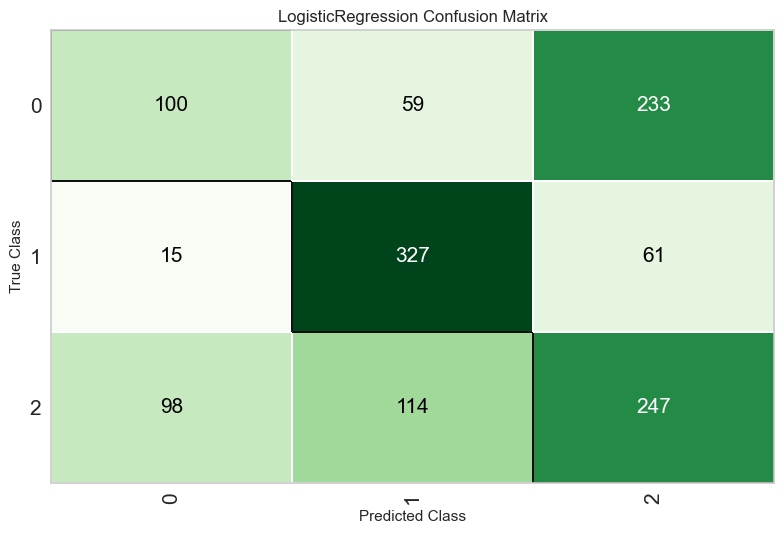

In [13]:
plot_model(comparemodels, plot = 'confusion_matrix')

In [14]:
import matplotlib.pyplot as plt

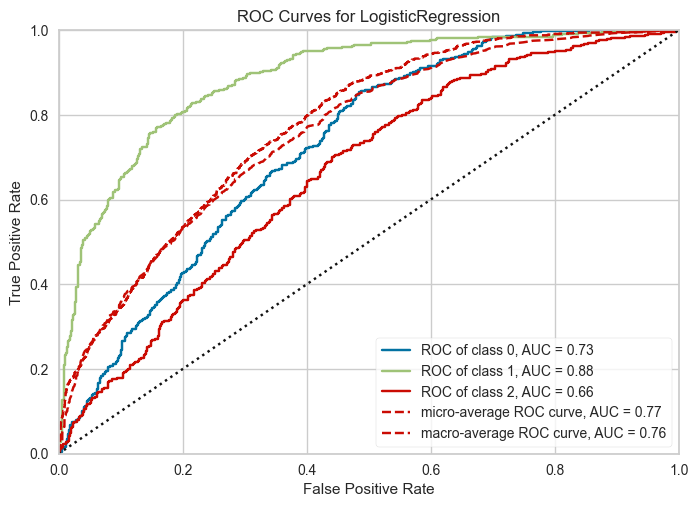

In [15]:
plot_model(comparemodels, plot='auc')

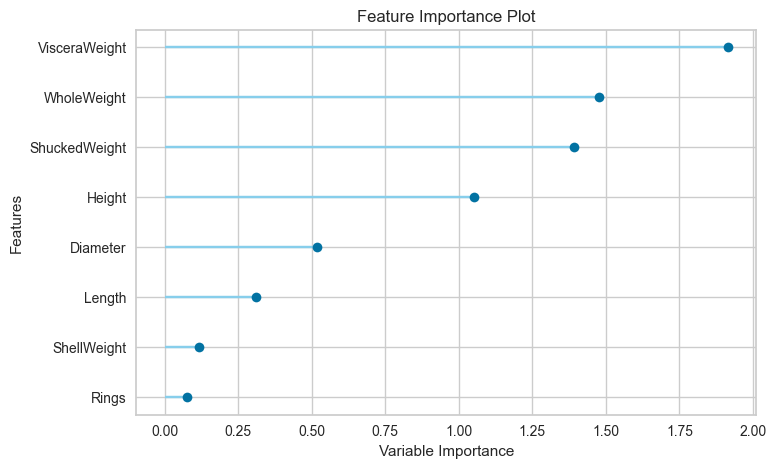

In [16]:
plot_model(comparemodels,plot='feature')

In [17]:
evaluate_model(comparemodels)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
pred=predict_model(comparemodels)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5375,0.7535,0.5375,0.5241,0.5169,0.3001,0.3074


In [19]:
pred.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex,prediction_label,prediction_score
1948,0.635,0.515,0.165,1.2290,0.5055,0.2975,0.3535,10,M,F,0.4947
956,0.495,0.400,0.135,0.6100,0.2720,0.1435,0.1440,7,M,I,0.5162
1341,0.585,0.490,0.185,1.1710,0.5220,0.2535,0.3350,10,M,M,0.4995
821,0.370,0.275,0.140,0.2215,0.0970,0.0455,0.0615,6,I,I,0.8118
569,0.410,0.320,0.115,0.3870,0.1650,0.1005,0.0985,11,F,I,0.4539


In [21]:
pred=predict_model(comparemodels, data=thedata)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5545,0.7563,0.5545,0.5441,0.5365,0.3262,0.3331


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex,prediction_label,prediction_score
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M,M,0.4600
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,M,I,0.7621
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,F,I,0.3888
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,M,I,0.4142
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I,I,0.7657


In [22]:
newdata=thedata.copy()
newdata.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
thepredictions=predict_model(comparemodels, data=newdata)
thepredictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5545,0.7563,0.5545,0.5441,0.5365,0.3262,0.3331


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex,prediction_label,prediction_score
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M,M,0.4600
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,M,I,0.7621
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,F,I,0.3888
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,M,I,0.4142
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I,I,0.7657


In [24]:
save_model(comparemodels,'TermProjectformachinelearning')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'WholeWeight', 'ShuckedWeight',
                                              'VisceraWeight', 'ShellWeight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                      

In [25]:
s2=setup(thedata, target = 'Sex', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


<Axes: >

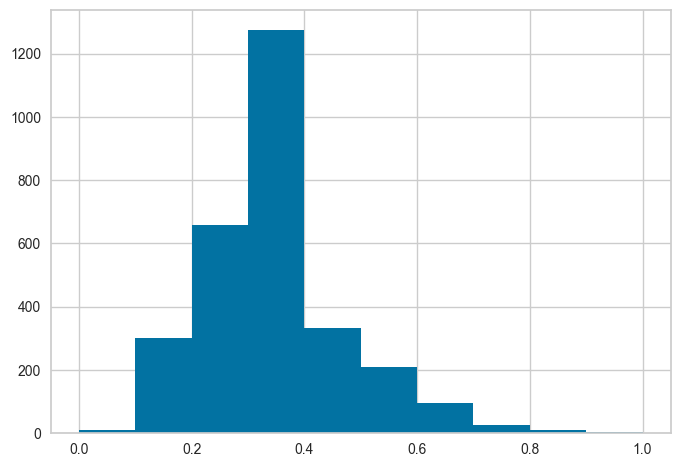

In [26]:
get_config('X_train_transformed')['Rings'].hist()

<Axes: >

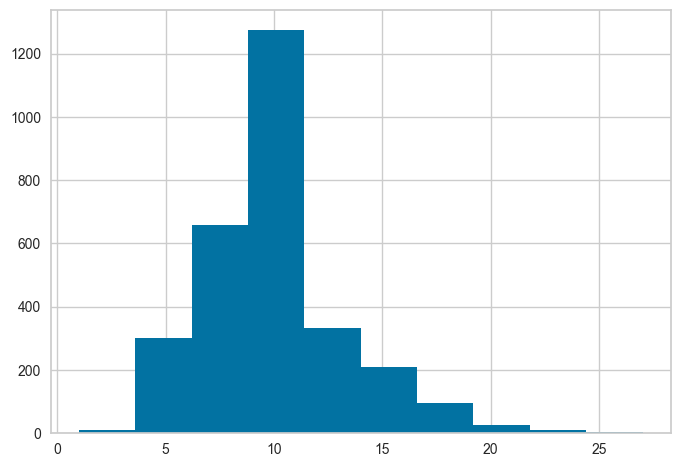

In [27]:
get_config('X_train')['Rings'].hist()

In [28]:
comapremodels2=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5569,0.0000,0.5569,0.5117,0.5175,0.3292,0.3519,0.0560
lr,Logistic Regression,0.5552,0.0000,0.5552,0.5471,0.5383,0.3274,0.3346,0.0480
ridge,Ridge Classifier,0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330,0.0380
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0330
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5365,0.3162,0.3191,0.8940
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.4060
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,4.4760
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.3070
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.1480
qda,Quadratic Discriminant Analysis,0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990,0.0330


In [29]:
comapremodels2

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
#check if all the models is included
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [31]:
best3models = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5569,0.0000,0.5569,0.5117,0.5175,0.3292,0.3519,0.0480
lr,Logistic Regression,0.5552,0.0000,0.5552,0.5471,0.5383,0.3274,0.3346,0.0440
ridge,Ridge Classifier,0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330,0.0320
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0330
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5365,0.3162,0.3191,0.9230
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.3400
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,5.6450
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.2890
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.1570
qda,Quadratic Discriminant Analysis,0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990,0.0330


In [32]:
best3models

[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

In [33]:
svm=create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5700,0.0000,0.5700,0.5613,0.5549,0.3583,0.3650
1,0.5802,0.0000,0.5802,0.5881,0.5821,0.3661,0.3676
2,0.5597,0.0000,0.5597,0.5708,0.5493,0.3455,0.3566
3,0.5788,0.0000,0.5788,0.5637,0.5652,0.3664,0.3702
4,0.5445,0.0000,0.5445,0.5435,0.5427,0.3175,0.3183
5,0.5205,0.0000,0.5205,0.3730,0.4300,0.2622,0.3067
6,0.5377,0.0000,0.5377,0.4089,0.4491,0.2851,0.3507
7,0.5651,0.0000,0.5651,0.4074,0.4677,0.3304,0.3878
8,0.5514,0.0000,0.5514,0.5372,0.5348,0.3274,0.3333


In [34]:
create_model('svm', return_train_score=True)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
# fold=10 (default)
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5631,0.0000,0.5631,0.5605,0.5491,0.3398,0.3465
1,0.5836,0.0000,0.5836,0.5872,0.5763,0.3700,0.3755
2,0.5392,0.0000,0.5392,0.5280,0.5264,0.3030,0.3074
3,0.5856,0.0000,0.5856,0.5796,0.5580,0.3733,0.3869
4,0.5479,0.0000,0.5479,0.5334,0.5222,0.3139,0.3243
5,0.5205,0.0000,0.5205,0.5046,0.5048,0.2766,0.2806
6,0.5445,0.0000,0.5445,0.5402,0.5309,0.3095,0.3160
7,0.5514,0.0000,0.5514,0.5320,0.5342,0.3240,0.3283
8,0.5753,0.0000,0.5753,0.5778,0.5586,0.3568,0.3666


In [36]:
create_model('lr', return_train_score=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
ridge=create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5597,0.0000,0.5597,0.5528,0.5427,0.3377,0.3455
1,0.5904,0.0000,0.5904,0.5824,0.5791,0.3835,0.3880
2,0.5358,0.0000,0.5358,0.5188,0.5156,0.3005,0.3067
3,0.5719,0.0000,0.5719,0.5693,0.5493,0.3559,0.3693
4,0.5479,0.0000,0.5479,0.5360,0.5311,0.3197,0.3261
5,0.5137,0.0000,0.5137,0.4982,0.4979,0.2689,0.2730
6,0.5548,0.0000,0.5548,0.5400,0.5405,0.3289,0.3327
7,0.5377,0.0000,0.5377,0.5171,0.5159,0.3046,0.3111
8,0.5514,0.0000,0.5514,0.5404,0.5334,0.3236,0.3303


In [38]:
create_model('ridge', return_train_score=True)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [39]:
tunemodel=tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5597,0.0000,0.5597,0.5443,0.5379,0.3422,0.3516
1,0.5939,0.0000,0.5939,0.5851,0.5822,0.3911,0.3961
2,0.5392,0.0000,0.5392,0.5201,0.5175,0.3093,0.3168
3,0.5445,0.0000,0.5445,0.5376,0.5228,0.3191,0.3312
4,0.5685,0.0000,0.5685,0.5591,0.5531,0.3547,0.3617
5,0.5342,0.0000,0.5342,0.5237,0.5132,0.3047,0.3147
6,0.5479,0.0000,0.5479,0.5313,0.5345,0.3223,0.3253
7,0.5616,0.0000,0.5616,0.5492,0.5428,0.3440,0.3523
8,0.5479,0.0000,0.5479,0.5351,0.5307,0.3226,0.3294


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [40]:
tunemodel2=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5631,0.0000,0.5631,0.5490,0.5499,0.3433,0.3469
1,0.6007,0.0000,0.6007,0.5945,0.5928,0.3986,0.4015
2,0.5495,0.0000,0.5495,0.5370,0.5393,0.3207,0.3230
3,0.5685,0.0000,0.5685,0.5535,0.5405,0.3482,0.3598
4,0.5445,0.0000,0.5445,0.5304,0.5295,0.3120,0.3164
5,0.5411,0.0000,0.5411,0.5259,0.5289,0.3093,0.3118
6,0.5548,0.0000,0.5548,0.5419,0.5441,0.3279,0.3305
7,0.5616,0.0000,0.5616,0.5445,0.5465,0.3406,0.3445
8,0.5890,0.0000,0.5890,0.5825,0.5745,0.3797,0.3862


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [41]:
tunemodel3=tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5529,0.0000,0.5529,0.5380,0.5344,0.3285,0.3351
1,0.5904,0.0000,0.5904,0.5833,0.5804,0.3840,0.3880
2,0.5461,0.0000,0.5461,0.5292,0.5264,0.3159,0.3221
3,0.5582,0.0000,0.5582,0.5499,0.5355,0.3364,0.3484
4,0.5548,0.0000,0.5548,0.5444,0.5404,0.3305,0.3360
5,0.5137,0.0000,0.5137,0.4982,0.4983,0.2693,0.2733
6,0.5445,0.0000,0.5445,0.5287,0.5311,0.3139,0.3168
7,0.5548,0.0000,0.5548,0.5388,0.5369,0.3309,0.3369
8,0.5582,0.0000,0.5582,0.5456,0.5397,0.3348,0.3417


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [42]:
blend_models(best3models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5666,0.0000,0.5666,0.5557,0.5551,0.3486,0.3521
1,0.5973,0.0000,0.5973,0.5969,0.5929,0.3922,0.3948
2,0.5427,0.0000,0.5427,0.5323,0.5363,0.3121,0.3128
3,0.5925,0.0000,0.5925,0.5843,0.5759,0.3865,0.3945
4,0.5582,0.0000,0.5582,0.5478,0.5492,0.3350,0.3371
5,0.5205,0.0000,0.5205,0.5078,0.5031,0.2749,0.2804
6,0.5445,0.0000,0.5445,0.5405,0.5283,0.3087,0.3169
7,0.5514,0.0000,0.5514,0.5289,0.5286,0.3221,0.3288
8,0.5514,0.0000,0.5514,0.5369,0.5365,0.3242,0.3284


VotingClassifier(estimators=[('SVM - Linear Kernel',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.001, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=-1,
                                            penalty='l2', power_t=0.5,
                                            random_state=123, shuffle=True,
                                            tol=0.001, validation_fraction=...
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Ridge Classifier',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, positive=False,
                                              random_state=123, solver='auto',
                                              tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

In [43]:
stack_models(best3models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5495,0.0000,0.5495,0.5757,0.5413,0.3130,0.3281
1,0.5461,0.0000,0.5461,0.6155,0.5296,0.3026,0.3397
2,0.5324,0.0000,0.5324,0.5763,0.4712,0.2779,0.3394
3,0.5822,0.0000,0.5822,0.5878,0.5527,0.3649,0.3817
4,0.5445,0.0000,0.5445,0.5398,0.5156,0.3046,0.3219
5,0.5616,0.0000,0.5616,0.5637,0.5621,0.3422,0.3426
6,0.5651,0.0000,0.5651,0.5702,0.5494,0.3383,0.3500
7,0.5205,0.0000,0.5205,0.5311,0.4774,0.2903,0.3161
8,0.5445,0.0000,0.5445,0.6538,0.5049,0.2987,0.3460


StackingClassifier(cv=5,
                   estimators=[('SVM - Linear Kernel',
                                SGDClassifier(alpha=0.0001, average=False,
                                              class_weight=None,
                                              early_stopping=False, epsilon=0.1,
                                              eta0=0.001, fit_intercept=True,
                                              l1_ratio=0.15,
                                              learning_rate='optimal',
                                              loss='hinge', max_iter=1000,
                                              n_iter_no_change=5, n_jobs=-1,
                                              penalty='l2', power_t=0.5,
                                              random_state=123, shuffle=True,
                                              tol=0.001,
                                              validation_fr...
                                                random_state=123, solver='auto',
                                                tol=0.0001))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

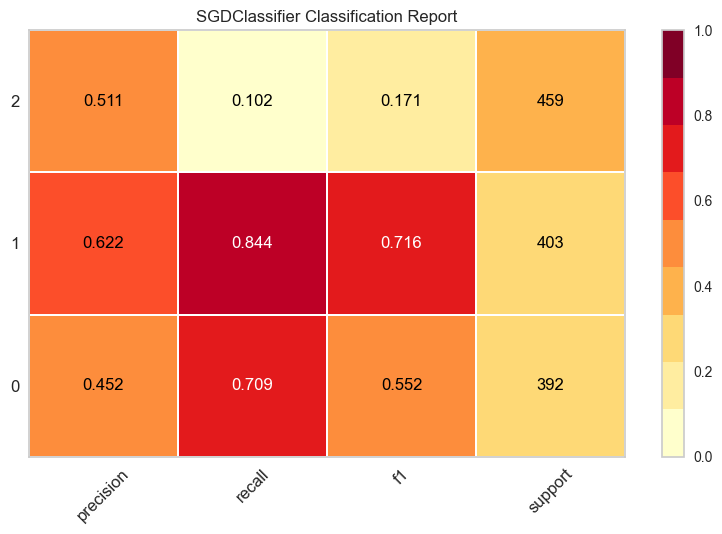

In [44]:
plot_model(comapremodels2, plot='class_report')

In [45]:
print(thedata['Sex'].value_counts())
counts = thedata['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [53]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
Xsmote, ysmote = smote.fit_resample(thedata.drop('Sex', axis=1), thedata['Sex'])
balancdata = pd.concat([Xsmote, ysmote], axis=1)
print( ysmote.value_counts())

Sex
F    1528
I    1528
M    1528
Name: count, dtype: int64


In [54]:

clf3 = setup(
    data=balancdata,             
    target='Sex',              
    session_id=123,
    normalize=True,            
    normalize_method='minmax'
)


,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4584, 9)"
5,Transformed data shape,"(4584, 9)"
6,Transformed train set shape,"(3208, 9)"
7,Transformed test set shape,"(1376, 9)"
8,Numeric features,8
9,Preprocess,True


In [55]:
compmodels=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5901,0.7851,0.5901,0.5816,0.5834,0.3851,0.3867,0.3090
rf,Random Forest Classifier,0.5882,0.7826,0.5882,0.5827,0.5840,0.3823,0.3833,0.3350
lightgbm,Light Gradient Boosting Machine,0.5711,0.7648,0.5711,0.5650,0.5659,0.3566,0.3580,4.6150
lr,Logistic Regression,0.5689,0.0000,0.5689,0.5546,0.5480,0.3533,0.3618,1.3800
gbc,Gradient Boosting Classifier,0.5639,0.0000,0.5639,0.5534,0.5562,0.3458,0.3474,0.9700
lda,Linear Discriminant Analysis,0.5611,0.0000,0.5611,0.5487,0.5497,0.3417,0.3449,0.0420
ridge,Ridge Classifier,0.5605,0.0000,0.5605,0.5499,0.5330,0.3407,0.3534,0.0360
knn,K Neighbors Classifier,0.5530,0.7291,0.5530,0.5464,0.5443,0.3295,0.3329,0.0580
svm,SVM - Linear Kernel,0.5452,0.0000,0.5452,0.5421,0.5004,0.3179,0.3395,0.0570
ada,Ada Boost Classifier,0.5352,0.0000,0.5352,0.5165,0.5131,0.3029,0.3104,0.1390


In [56]:
best3models2= compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5901,0.7851,0.5901,0.5816,0.5834,0.3851,0.3867,0.3440
rf,Random Forest Classifier,0.5882,0.7826,0.5882,0.5827,0.5840,0.3823,0.3833,0.4460
lightgbm,Light Gradient Boosting Machine,0.5711,0.7648,0.5711,0.5650,0.5659,0.3566,0.3580,5.0320
lr,Logistic Regression,0.5689,0.0000,0.5689,0.5546,0.5480,0.3533,0.3618,0.0490
gbc,Gradient Boosting Classifier,0.5639,0.0000,0.5639,0.5534,0.5562,0.3458,0.3474,1.1070
lda,Linear Discriminant Analysis,0.5611,0.0000,0.5611,0.5487,0.5497,0.3417,0.3449,0.0370
ridge,Ridge Classifier,0.5605,0.0000,0.5605,0.5499,0.5330,0.3407,0.3534,0.0330
knn,K Neighbors Classifier,0.5530,0.7291,0.5530,0.5464,0.5443,0.3295,0.3329,0.0580
svm,SVM - Linear Kernel,0.5452,0.0000,0.5452,0.5421,0.5004,0.3179,0.3395,0.0510
ada,Ada Boost Classifier,0.5352,0.0000,0.5352,0.5165,0.5131,0.3029,0.3104,0.1660


In [57]:
best3models2

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_scor

In [58]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6044,0.7979,0.6044,0.6036,0.6039,0.4065,0.4066
1,0.6293,0.8110,0.6293,0.6275,0.6284,0.4439,0.4439
2,0.5701,0.7689,0.5701,0.5623,0.5627,0.3551,0.3573
3,0.6137,0.7753,0.6137,0.6030,0.6040,0.4206,0.4235
4,0.6137,0.7999,0.6137,0.6099,0.6109,0.4206,0.4212
5,0.5234,0.7320,0.5234,0.5160,0.5189,0.2850,0.2855
6,0.5670,0.7705,0.5670,0.5585,0.5602,0.3505,0.3524
7,0.6012,0.8031,0.6012,0.6036,0.6017,0.4019,0.4024
8,0.5656,0.7846,0.5656,0.5548,0.5590,0.3486,0.3493


In [59]:
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5576,0.0000,0.5576,0.5456,0.5495,0.3364,0.3377
1,0.5794,0.0000,0.5794,0.5763,0.5770,0.3692,0.3698
2,0.5265,0.0000,0.5265,0.5080,0.5129,0.2897,0.2921
3,0.5639,0.0000,0.5639,0.5538,0.5571,0.3458,0.3468
4,0.5857,0.0000,0.5857,0.5741,0.5774,0.3785,0.3801
5,0.5358,0.0000,0.5358,0.5245,0.5273,0.3037,0.3054
6,0.5888,0.0000,0.5888,0.5804,0.5808,0.3832,0.3860
7,0.5950,0.0000,0.5950,0.5928,0.5938,0.3925,0.3926
8,0.5500,0.0000,0.5500,0.5371,0.5415,0.3252,0.3264


In [60]:
lightgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5576,0.7600,0.5576,0.5532,0.5545,0.3364,0.3371
1,0.5919,0.7837,0.5919,0.5974,0.5943,0.3879,0.3881
2,0.5607,0.7446,0.5607,0.5486,0.5521,0.3411,0.3427
3,0.5607,0.7509,0.5607,0.5479,0.5483,0.3411,0.3448
4,0.5950,0.7883,0.5950,0.5889,0.5913,0.3925,0.3929
5,0.5140,0.7340,0.5140,0.5083,0.5102,0.2710,0.2716
6,0.5888,0.7689,0.5888,0.5791,0.5815,0.3832,0.3849
7,0.5888,0.7829,0.5888,0.5969,0.5903,0.3832,0.3850
8,0.5500,0.7591,0.5500,0.5360,0.5410,0.3252,0.3264


In [61]:
rftuned=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5670,0.7752,0.5670,0.5520,0.5536,0.3505,0.3542
1,0.5794,0.7900,0.5794,0.5667,0.5628,0.3692,0.3766
2,0.5296,0.7588,0.5296,0.5064,0.5114,0.2944,0.2982
3,0.5576,0.7448,0.5576,0.5465,0.5399,0.3364,0.3435
4,0.5202,0.7542,0.5202,0.5017,0.5042,0.2804,0.2841
5,0.5171,0.7399,0.5171,0.5025,0.5018,0.2757,0.2802
6,0.5732,0.7614,0.5732,0.5613,0.5502,0.3598,0.3719
7,0.5732,0.7859,0.5732,0.5628,0.5618,0.3598,0.3644
8,0.5656,0.7688,0.5656,0.5505,0.5438,0.3487,0.3574


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
gbctuned=tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5981,0.0000,0.5981,0.5909,0.5864,0.3972,0.4027
1,0.6044,0.0000,0.6044,0.6024,0.5991,0.4065,0.4100
2,0.5826,0.0000,0.5826,0.5755,0.5700,0.3738,0.3796
3,0.5576,0.0000,0.5576,0.5433,0.5401,0.3364,0.3428
4,0.5888,0.0000,0.5888,0.5806,0.5784,0.3832,0.3873
5,0.5327,0.0000,0.5327,0.5234,0.5247,0.2991,0.3012
6,0.5794,0.0000,0.5794,0.5693,0.5653,0.3692,0.3762
7,0.5950,0.0000,0.5950,0.5938,0.5848,0.3925,0.4001
8,0.5469,0.0000,0.5469,0.5265,0.5296,0.3205,0.3250


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
lightgbmtuned=tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5701,0.7740,0.5701,0.5632,0.5648,0.3551,0.3564
1,0.5888,0.7885,0.5888,0.5888,0.5888,0.3832,0.3832
2,0.5421,0.7512,0.5421,0.5278,0.5308,0.3131,0.3154
3,0.5919,0.7549,0.5919,0.5797,0.5776,0.3879,0.3932
4,0.5826,0.7809,0.5826,0.5732,0.5747,0.3738,0.3759
5,0.5389,0.7344,0.5389,0.5344,0.5346,0.3084,0.3097
6,0.5888,0.7701,0.5888,0.5825,0.5825,0.3832,0.3856
7,0.5857,0.7803,0.5857,0.5870,0.5852,0.3785,0.3794
8,0.5625,0.7571,0.5625,0.5513,0.5551,0.3438,0.3450


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [64]:
modelsblended=blend_models(best3models2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5981,0.7897,0.5981,0.5930,0.5951,0.3972,0.3975
1,0.6137,0.8059,0.6137,0.6159,0.6148,0.4206,0.4206
2,0.5826,0.7704,0.5826,0.5723,0.5742,0.3738,0.3759
3,0.5950,0.7747,0.5950,0.5826,0.5839,0.3925,0.3958
4,0.6075,0.8031,0.6075,0.5998,0.6024,0.4112,0.4120
5,0.5140,0.7418,0.5140,0.5041,0.5072,0.2710,0.2721
6,0.5794,0.7778,0.5794,0.5729,0.5745,0.3692,0.3704
7,0.6199,0.8016,0.6199,0.6214,0.6201,0.4299,0.4303
8,0.5750,0.7793,0.5750,0.5616,0.5661,0.3627,0.3640


In [65]:
modelsstacked=stack_models(best3models2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6106,0.0000,0.6106,0.6082,0.6093,0.4159,0.4159
1,0.6168,0.0000,0.6168,0.6202,0.6182,0.4252,0.4255
2,0.5763,0.0000,0.5763,0.5656,0.5677,0.3645,0.3666
3,0.6106,0.0000,0.6106,0.6011,0.6006,0.4159,0.4195
4,0.6075,0.0000,0.6075,0.6020,0.6041,0.4112,0.4116
5,0.5358,0.0000,0.5358,0.5272,0.5298,0.3037,0.3048
6,0.5857,0.0000,0.5857,0.5797,0.5794,0.3785,0.3811
7,0.5732,0.0000,0.5732,0.5801,0.5740,0.3598,0.3618
8,0.5719,0.0000,0.5719,0.5622,0.5662,0.3579,0.3585


In [66]:
finalmodel=finalize_model(modelsblended)

In [67]:
finalmodel

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'WholeWeight', 'ShuckedWeight',
                                             'VisceraWeight', 'ShellWeight',
                                             'Rings'],
                                    transformer=SimpleImputer(add_indicator=Fa...
                                                              importance_type='split',
                                                              learning_rate=0.1,
                                                              max_depth=-1,
                                                              min_child_samples=20,
                                                              min_child_weight=0.001,
                                                              min_split_gain=0.0,
                                                              n_estimators=100,
                                                              n_jobs=-1,
                                                              num_leaves=31,
                                                              objective=None,
                                                              random_state=123,
                                                              reg_alpha=0.0,
                                                              reg_lambda=0.0,
                                                              subsample=1.0,
                                                              subsample_for_bin=200000,
                                                              subsample_freq=0))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

In [72]:
#checking the features improtnce for each model to determine the reason of low performance 
from pycaret.classification import pull
base_models = [rf, gbc, lightgbm]  
for model in base_models:
    if hasattr(model, 'feature_importances_'):
        print(model.__class__.__name__)
        print(model.feature_importances_)


RandomForestClassifier
[0.0975709  0.10567474 0.11041948 0.15584231 0.12712508 0.16189637
 0.13768959 0.10378154]
GradientBoostingClassifier
[0.06204319 0.04257181 0.06109202 0.16320524 0.06721589 0.35926613
 0.11788976 0.12671595]
LGBMClassifier
[1119 1001  948 1193 1384 1359 1425  571]
